## 2. **Veri776**

## 2.1 **Download dataset**

In [ ]:
%%shell
rm -rf dataset.zip
gdown -O dataset.zip 1mCT8Yb_PuDtR2FJ94AcRcRwvMLMbPbiB
unzip -q dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1mCT8Yb_PuDtR2FJ94AcRcRwvMLMbPbiB
From (redirected): https://drive.google.com/uc?id=1mCT8Yb_PuDtR2FJ94AcRcRwvMLMbPbiB&confirm=t&uuid=5ad284e3-3779-40b4-85af-0b111a449b59
To: /content/dataset.zip
100% 997M/997M [00:14<00:00, 66.7MB/s]


# **Convert from XML to CSV**

In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET
import os

def convert_xml_to_csv(root_folder, file_mapping):
    for xml_file, csv_file in file_mapping.items():
        xml_path = os.path.join(root_folder, xml_file)
        csv_path = os.path.join(root_folder, csv_file)


        with open(xml_path, "r", encoding="ascii", errors="ignore") as f:
            xml_content = f.read()


        root = ET.fromstring(xml_content)


        items = root.findall(".//Item")


        data = [item.attrib for item in items]


        df = pd.DataFrame(data)


        df.to_csv(csv_path, index=False)

        print(f"Conversion {xml_file} -> {csv_file} completed!")


root_folder = "./VeRi776/VeRi/"
file_mapping = {
    "train_label.xml": "train_label.csv",
    "test_label.xml": "test_label.csv"
}

convert_xml_to_csv(root_folder, file_mapping)

Conversion train_label.xml -> train_label.csv completed!
Conversion test_label.xml -> test_label.csv completed!


# 2.2. **EDA**

# **Download libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Prepare dataset**

In [ ]:
import os

root_folder = "./VeRi776/VeRi/"
ds_files={
    "train_label.csv": "train_label.csv",
    "test_label.csv": "test_label.csv",
    "name_train.txt": "name_train.txt",
    "name_test.txt": "name_test.txt",
    "name_query.txt": "name_query.txt",
    "list_color.txt": "list_color.txt",
    "list_type.txt": "list_type.txt"
}

# Read datasets
train_df = pd.read_csv(os.path.join(root_folder, ds_files["train_label.csv"]))
test_df = pd.read_csv(os.path.join(root_folder, ds_files["test_label.csv"]))
color_df= pd.read_csv(os.path.join(root_folder, ds_files["list_color.txt"]), delimiter=" ", header=None)
type_df= pd.read_csv(os.path.join(root_folder, ds_files["list_type.txt"]), delimiter=" ", header=None)
train_df.head()

,imageName,vehicleID,cameraID,colorID,typeID
0,0001_c001_00016450_0.jpg,1,c001,1,4
1,0001_c001_00016460_0.jpg,1,c001,1,4
2,0001_c001_00016470_0.jpg,1,c001,1,4
3,0001_c001_00016480_0.jpg,1,c001,1,4
4,0001_c001_00016490_0.jpg,1,c001,1,4


**Information of the dataset:** train_df, test_df, color_df, type_df

In [ ]:
print(train_df.info())
train_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37746 entries, 0 to 37745
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imageName  37746 non-null  object
 1   vehicleID  37746 non-null  int64 
 2   cameraID   37746 non-null  object
 3   colorID    37746 non-null  int64 
 4   typeID     37746 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB
None


,imageName,vehicleID,cameraID,colorID,typeID
7874,0165_c010_00057885_0.jpg,165,c010,4,8
8410,0178_c017_00008115_0.jpg,178,c017,5,1
29963,0589_c002_00020665_0.jpg,589,c002,10,2
17576,0348_c005_00028315_1.jpg,348,c005,7,1
2431,0039_c017_00007510_0.jpg,39,c017,5,1


In [ ]:
print(test_df.info())
test_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11579 entries, 0 to 11578
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imageName  11579 non-null  object
 1   vehicleID  11579 non-null  int64 
 2   cameraID   11579 non-null  object
 3   colorID    11579 non-null  int64 
 4   typeID     11579 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 452.4+ KB
None


,imageName,vehicleID,cameraID,colorID,typeID
5219,0365_c001_00030790_0.jpg,365,c001,7,2
10319,0663_c006_00038495_0.jpg,663,c006,10,1
5585,0380_c006_00061650_0.jpg,380,c006,7,2
744,0074_c006_00001085_0.jpg,74,c006,4,6
7022,0477_c004_00060090_0.jpg,477,c004,10,1


In [ ]:
color_df, type_df

(    0       1
 0   1  yellow
 1   2  orange
 2   3   green
 3   4    gray
 4   5     red
 5   6    blue
 6   7   white
 7   8  golden
 8   9   brown
 9  10   black,
    0          1
 0  1      sedan
 1  2        suv
 2  3        van
 3  4  hatchback
 4  5        mpv
 5  6     pickup
 6  7        bus
 7  8      truck
 8  9     estate)

In [ ]:
#Convert color and type to csv files
color_df.to_csv("color_table.csv", index=False)
type_df.to_csv("type_table.csv", index=False)

## **Print samples of image**

In [ ]:
#Change column names
color_df.columns=["colorID", "colorName"]
type_df.columns=["typeID", "typeName"]
#Change type of colorID and typeID to int
color_df["colorID"] = color_df["colorID"].astype(int)
type_df["typeID"] = type_df["typeID"].astype(int)
#Merge color_df and type_df into train_df
df_full = train_df.merge(color_df, on="colorID", how="left")
df_full = df_full.merge(type_df, on="typeID", how="left")
df_full.sample(10)

,imageName,vehicleID,cameraID,colorID,typeID,colorName,typeName
13644,0271_c014_00022945_0.jpg,271,c014,6,7,blue,bus
21828,0424_c014_00071010_0.jpg,424,c014,4,2,gray,suv
17248,0339_c014_00060290_0.jpg,339,c014,7,1,white,sedan
14813,0284_c011_00085555_0.jpg,284,c011,6,7,blue,bus
4047,0068_c014_00073715_0.jpg,68,c014,3,7,green,bus
3346,0055_c003_00013070_0.jpg,55,c003,7,6,white,pickup
8414,0178_c019_00007965_0.jpg,178,c019,5,1,red,sedan
24863,0484_c013_00048550_0.jpg,484,c013,4,1,gray,sedan
24371,0472_c015_00018400_0.jpg,472,c015,10,1,black,sedan
7536,0158_c017_00074030_0.jpg,158,c017,5,8,red,truck


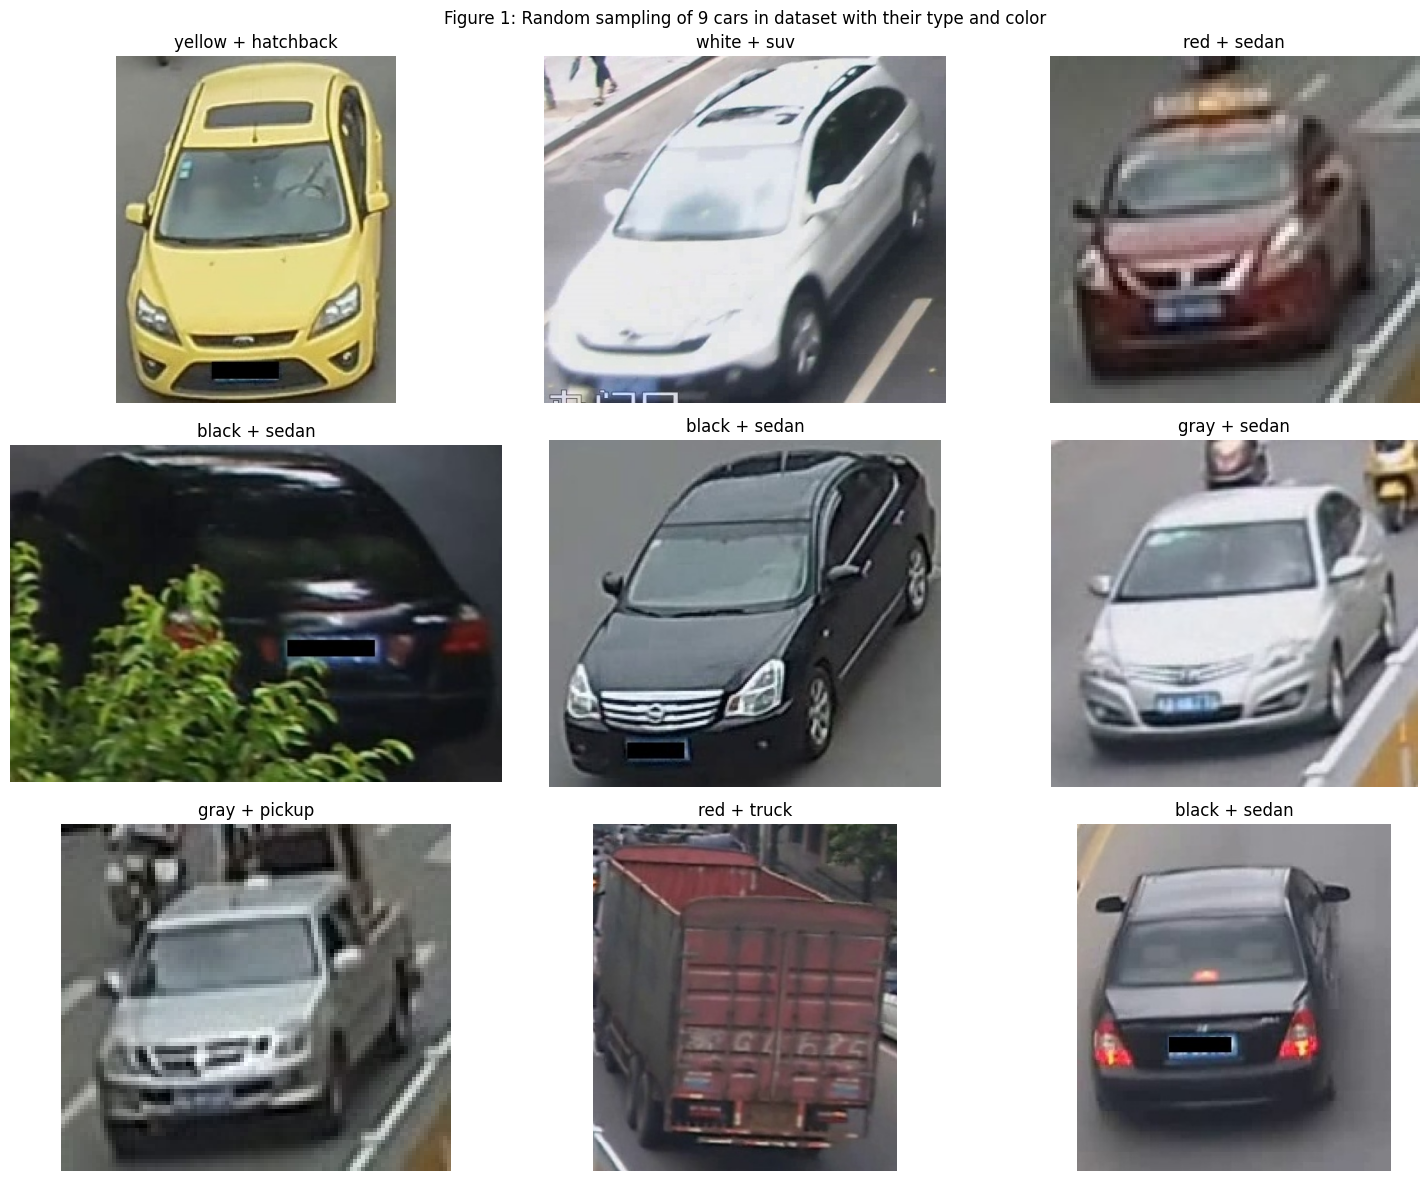

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

#Sampling 9 sample from df_full
sample_df = df_full.sample(9, random_state=42)

image_folder = "./VeRi776/VeRi/image_train"

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_df.iterrows()):
    img_path = os.path.join(image_folder, row["imageName"])
    image = Image.open(img_path).convert("RGB")
    ax.imshow(image)
    ax.set_title(f'{row["colorName"]} + {row["typeName"]}', fontsize=12)
    ax.axis('off')

plt.suptitle("Figure 1: Random sampling of 9 cars in dataset with their type and color")
plt.tight_layout()
plt.show()

## **Distribution of cars by colors**
From the Figure 1, it can be seen that color values were imbalanced: most cars were black and grey, and there were not many cars with colors like orange and brown

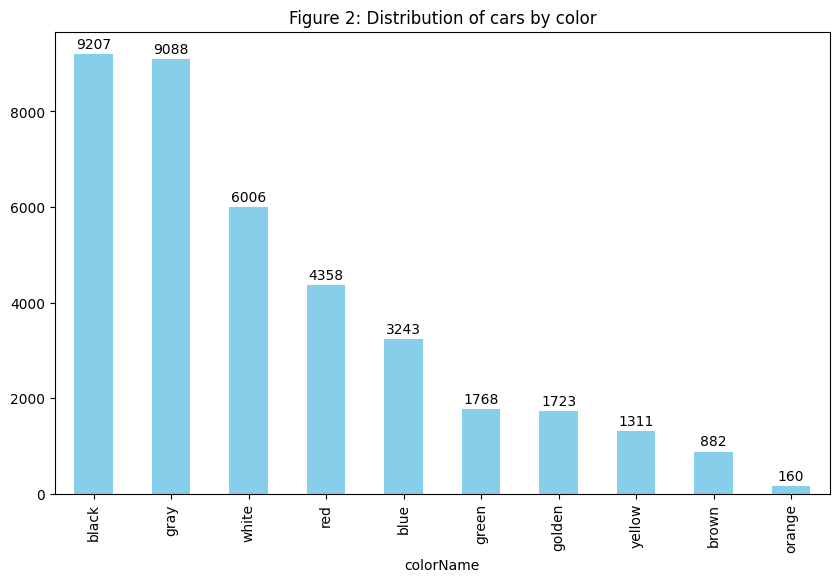

In [ ]:
plt.figure(figsize=(10,6))
ax = df_full.colorName.value_counts().plot(kind="bar", color="skyblue")
plt.title("Figure 2: Distribution of cars by color")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.show()

## **Distribution of cars by type**
From Figure 3, we can conclude that most cars were Sedan type, the number of Sedan cars equals to the sum of all other cars of other types, which indicated extreme imbalance

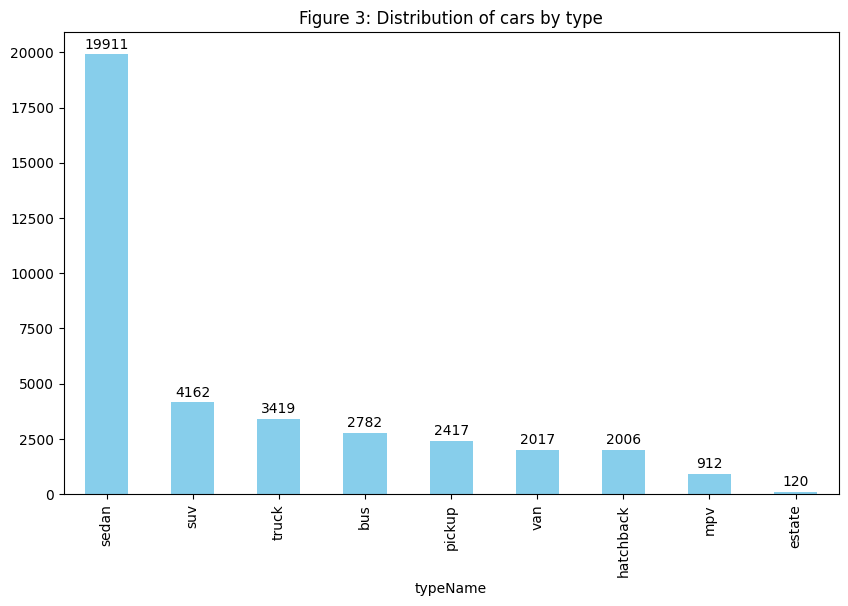

In [ ]:
plt.figure(figsize=(10,6))
ax = df_full.typeName.value_counts().plot(kind="bar", color="skyblue")
plt.title("Figure 3: Distribution of cars by type")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.show()

## **Correlation between Car Types and Colors**
This Figure showed the most common colors for each car type, for example, Sedan cars were mostly black and grey, while buses were mostly blue

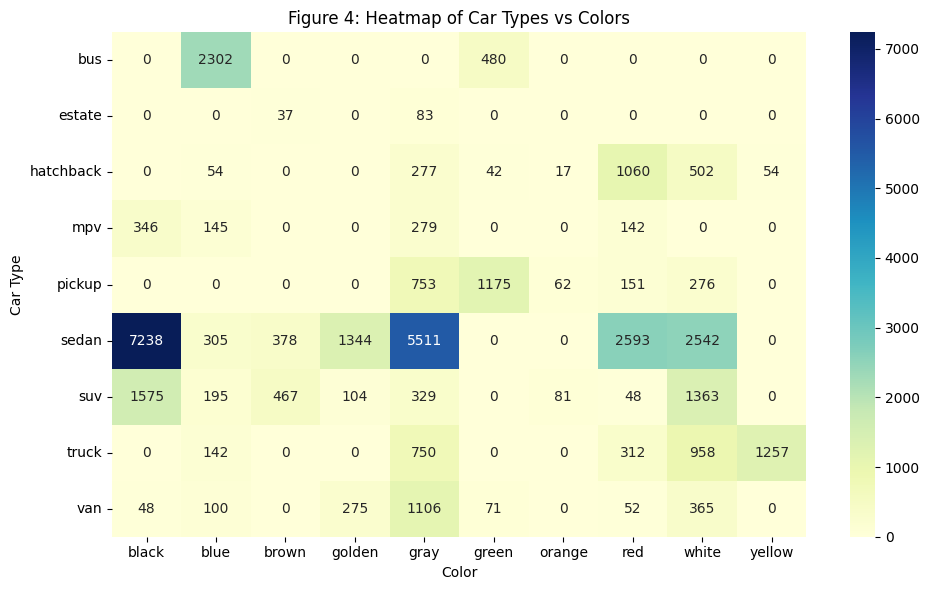

In [ ]:
heatmap_data = pd.crosstab(df_full["typeName"], df_full["colorName"])
heatmap_data
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Figure 4: Heatmap of Car Types vs Colors")
plt.xlabel("Color")
plt.ylabel("Car Type")
plt.tight_layout()
plt.show()

## **How many images did each camera capture?**
From the Figure, it can be seen that the cameras did not capture the same number of images. CameraID c014 captured at most 2728 images, while c020 captured only 22 images

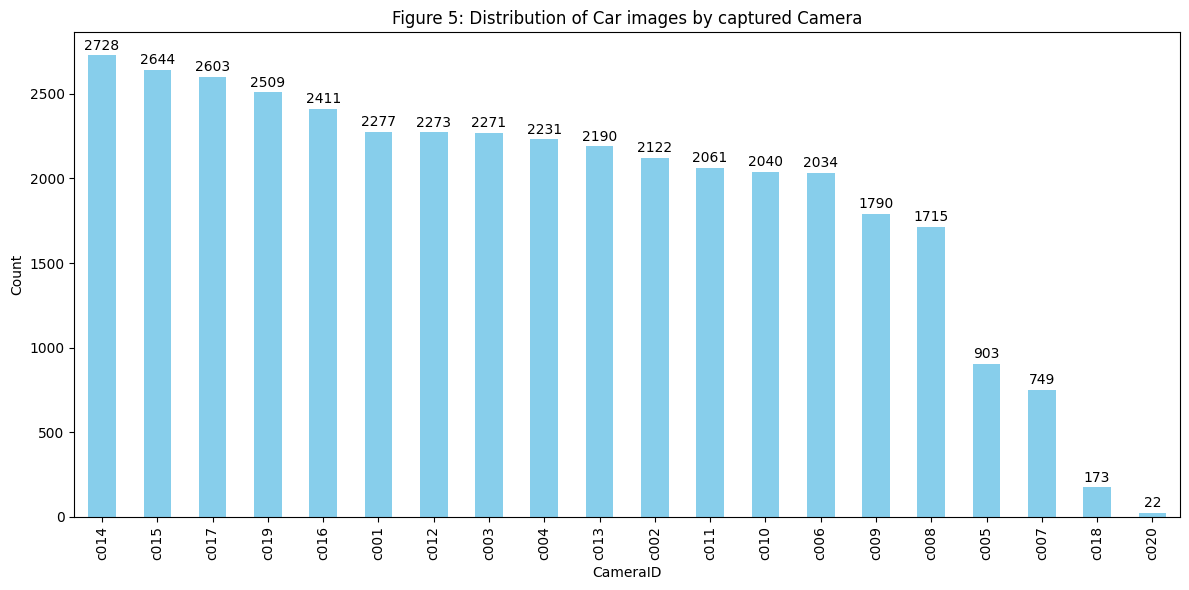

In [ ]:
plt.figure(figsize=(12, 6))
ax = df_full.cameraID.value_counts().plot(kind="bar", color="skyblue")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.title("Figure 5: Distribution of Car images by captured Camera")
plt.xlabel("CameraID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## **How many times was a car captured?**
From Figure 6, it can be seen that all the vehicles in this dataset was not captured once, but multiple times, ranging from 10-20 times to nearly 300 times, at maximum

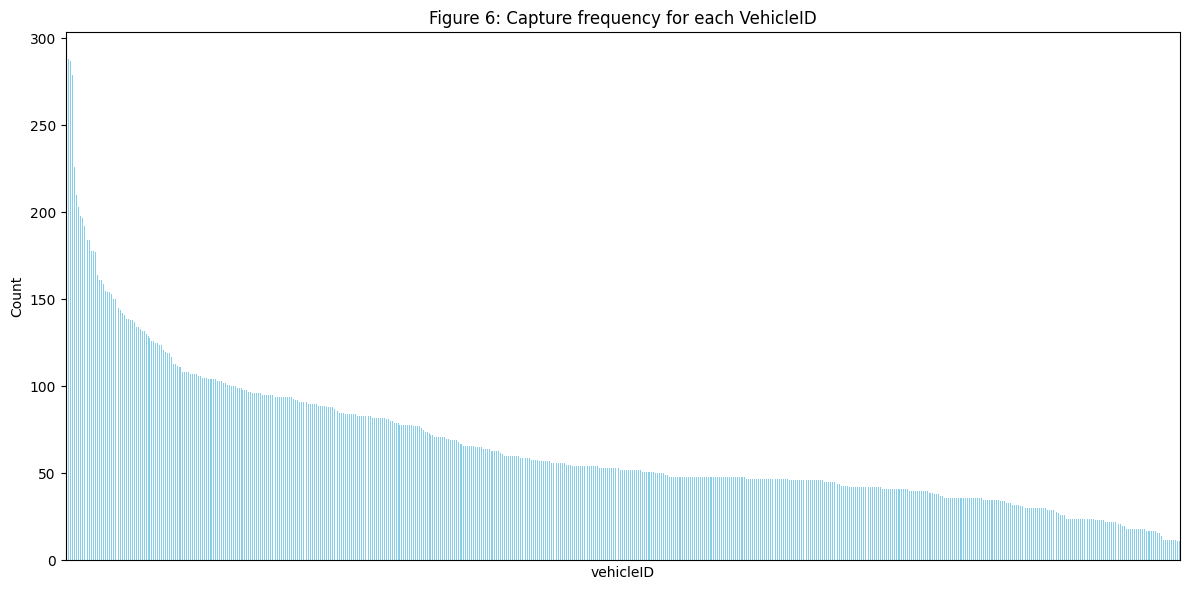

In [ ]:
plt.figure(figsize=(12, 6))
ax = df_full.vehicleID.value_counts().plot(kind="bar", color="skyblue")
plt.title("Figure 6: Capture frequency for each VehicleID")
ax.set_xticks([])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2.3. **Training model for car colors**

## **Install packages**

In [ ]:
!pip install scikit-learn torchvision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00


## **Import libraries**

In [ ]:
import warnings

# Suppress specific ImportWarnings
warnings.filterwarnings("ignore", category=ImportWarning)
import os
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms, models
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## **Prepare the dataset**

### **Dataset loading**
* Create a custom function to get the images and their labels from the dataset

In [ ]:
root = "./VeRi776/VeRi"
train_df = pd.read_csv(os.path.join(root, "train_label.csv"))
test_df = pd.read_csv(os.path.join(root, "test_label.csv"))
color_df = pd.read_csv("color_table.csv", header=None)
color_df.columns = ['colorID', 'colorName']
color_df["colorID"] = color_df["colorID"].astype(int)


train_df = train_df.merge(color_df, on="colorID", how="left")
test_df = test_df.merge(color_df, on="colorID", how="left")

class VehicleColorDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["imageName"])
        image = Image.open(img_path).convert("RGB")
        label = int(row["colorID"]) - 1
        if self.transform:
            image = self.transform(image)
        return image, label

### Normalize data
* Calculated mean and standard deviation of all images in the dataset to normalize
* At the same time, resized the images and turned to tensor

In [ ]:
tmp_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

tmp_dataset = VehicleColorDataset(train_df, os.path.join(root, "image_train"), tmp_transform)

def compute_mean_std(dataset):
    loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)
    mean = 0.0
    std = 0.0
    nb_samples = 0

    for data, _ in tqdm(loader, desc="Calculating mean/std"):
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean += data.mean(2).sum(0)
        std += data.std(2).sum(0)
        nb_samples += batch_samples

    mean /= nb_samples
    std /= nb_samples
    return mean, std

mean, std = compute_mean_std(tmp_dataset)
print("Mean:", mean)
print("Std:", std)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])

Calculating mean/std: 100%|██████████| 590/590 [02:00<00:00,  4.90it/s]

Mean: tensor([0.4209, 0.4206, 0.4268])
Std: tensor([0.1865, 0.1853, 0.1848])


### **Train/val/test split**
* Training set was split into train/val with ratio 80/20
* Load into data loader with ``batch_size = 64``

In [ ]:
train_split, val_split = train_test_split(train_df, test_size=0.2, stratify=train_df["colorID"], random_state=42)

train_dataset = VehicleColorDataset(train_split, os.path.join(root, "image_train"), transform)
val_dataset = VehicleColorDataset(val_split, os.path.join(root, "image_train"), transform)
test_dataset = VehicleColorDataset(test_df, os.path.join(root, "image_test"), transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

num_classes = train_df["colorID"].nunique()

## **Training with ResNet18**
* ResNet18 is a deep convolutional neural network (CNN) architecture
designed for image classification tasks.
* For this dataset, the fc layer (the last layer) was originally size ``Linear(512, 1000)``, was reshape into size ``Linear(512, num_classes)`` to fit with the classification task
* ``optimizer``: use Adam optimizer, with learning rate to control the degree of weights update
* loss function: use Cross entropy, suitable for multi-class classification
* Only 3 epochs were train to save training time


In [ ]:
weights = ResNet18_Weights.DEFAULT  # Update new weights for Resnet18
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

model.train()
epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    print(f"\nEpoch {epoch+1}/{epochs}")
    for images, labels in tqdm(train_loader, desc="Training:"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1} - Average Loss: {avg_loss:.4f}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]



Epoch 1/3


Training:: 100%|██████████| 472/472 [02:55<00:00,  2.69it/s]


Epoch 1 - Average Loss: 0.1995

Epoch 2/3


Training:: 100%|██████████| 472/472 [03:10<00:00,  2.47it/s]


Epoch 2 - Average Loss: 0.0164

Epoch 3/3


Training:: 100%|██████████| 472/472 [02:48<00:00,  2.80it/s]

Epoch 3 - Average Loss: 0.0155


## **Model evaluation**
*   **Recall:** the number of True Positives versus all samples that are actually True (including True Positive and False Negative)  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
* **Precision:** the number of True Positives among the True outputs from the model
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
*   **f1 score:** The F1 score is the harmonic mean (a kind of average) of precision and recall. The formula:
$$
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{2 \cdot \text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}}
$$
*   **Confusion Matrix:** visualize TP, TN, FP, FN

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad(): #use test set to evaluate model without updating weights
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

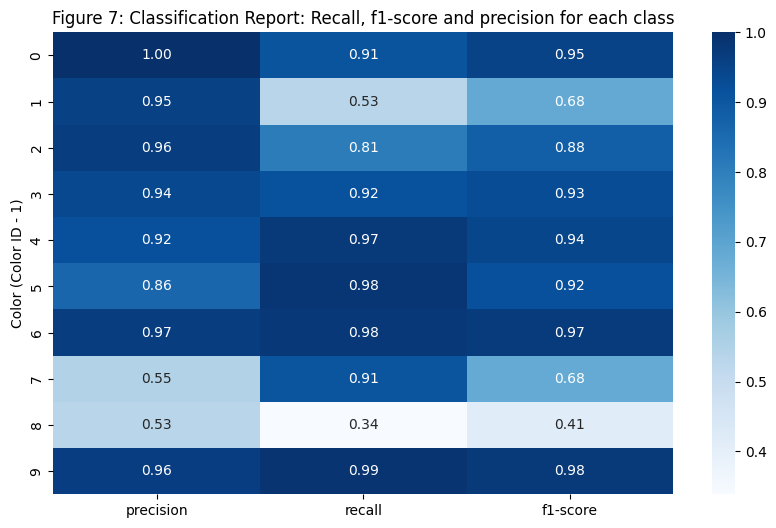

In [ ]:
report = classification_report(all_labels, all_preds, digits=4, output_dict=True)

report_df = pd.DataFrame.from_dict(report).transpose().drop(["accuracy","macro avg","weighted avg"], axis=0).drop("support", axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Figure 7: Classification Report: Recall, f1-score and precision for each class")
plt.ylabel("Color (Color ID - 1)")
plt.show()


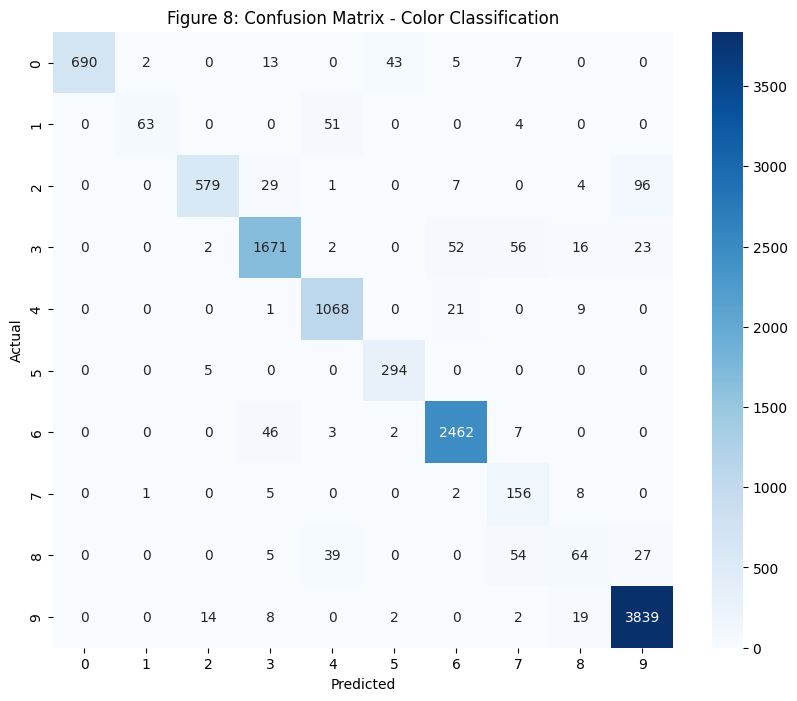

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Figure 8: Confusion Matrix - Color Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2.4. **Training model for car type classification**

## **Prepare the dataset**

In [ ]:
root = "./VeRi776/VeRi"
train_df = pd.read_csv(os.path.join(root, "train_label.csv"))
test_df = pd.read_csv(os.path.join(root, "test_label.csv"))
type_df = pd.read_csv("type_table.csv", header=None)
type_df.columns = ['typeID', 'typeName']
type_df["typeID"] = type_df["typeID"].astype(int)

train_df = train_df.merge(type_df, on="typeID", how="left")
test_df = test_df.merge(type_df, on="typeID", how="left")
train_df.sample(5), test_df.sample(5)

(                      imageName  vehicleID cameraID  colorID  typeID typeName
 25538  0500_c013_00019290_0.jpg        500     c013        4       1    sedan
 32124  0644_c013_00087750_0.jpg        644     c013       10       1    sedan
 11824  0248_c001_00018975_0.jpg        248     c001        9       1    sedan
 30799  0611_c019_00059355_0.jpg        611     c019       10       2      suv
 22975  0444_c006_00031285_0.jpg        444     c006        4       5      mpv,
                      imageName  vehicleID cameraID  colorID  typeID typeName
 5819  0391_c015_00035470_0.jpg        391     c015        1       8    truck
 3739  0249_c014_00021415_0.jpg        249     c014        9       1    sedan
 1709  0132_c019_00017405_0.jpg        132     c019        7       8    truck
 917   0101_c015_00045600_0.jpg        101     c015        3       6   pickup
 6546  0421_c017_00062200_0.jpg        421     c017        4       2      suv)

### **Treat imbalance data**
From Figure 3, the distribution of car types were extremely imbalance with Sedan cars contributed 50% value of the whole dataset and nearly 5 times more than second class - Suv with only 4162 cars. Therefore, to treat imbalance data, I used 2 techniques:


*   **Undersampling:** set a threshold for maximum number of samples per class. If a class exceed this threshold, its samples will be randomly selected until reach this threshold and discard the ones not selected
*   **Weighted loss function:** class with less samples will have higher weights in determining loss function, this means if the model misclassify samples from a minority class, the loss function will be higher. This helps balancing the model, making it more important to classify the minority class correctly


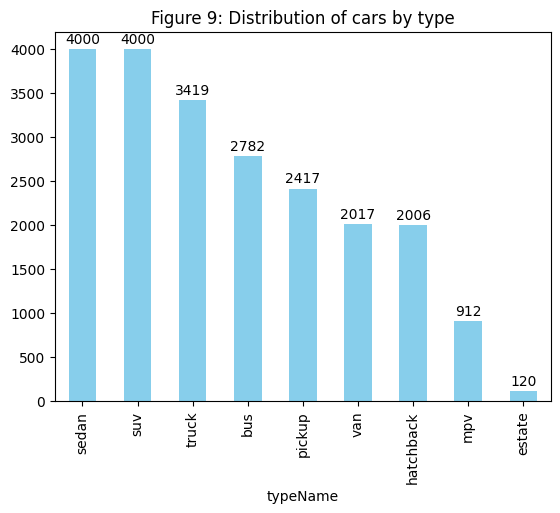

In [ ]:
# Undersampling
class_counts = train_df["typeName"].value_counts()
# print(class_counts)
target_count = 4000
dfs = []

for label in class_counts.index:
    df_label = train_df[train_df["typeName"] == label]
    if len(df_label) > target_count:
        df_label = df_label.sample(target_count, random_state=42)
    dfs.append(df_label)

train_df = pd.concat(dfs).reset_index(drop=True)
ax = train_df.typeName.value_counts().plot(kind="bar",color="skyblue")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.title("Figure 9: Distribution of cars by type")
plt.show()

# Weighted loss function
class_weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float32)
# print(class_weights)
class_weights = class_weights * (len(class_counts) / class_weights.sum()) #Normalize
# print(len(class_counts))
# print(class_weights)
class_weights = class_weights.to(device)

In [ ]:
class VehicleTypeDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["imageName"])
        image = Image.open(img_path).convert("RGB")
        label = int(row["typeID"]) - 1
        if self.transform:
            image = self.transform(image)
        return image, label

tmp_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

tmp_dataset = VehicleTypeDataset(train_df, os.path.join(root, "image_train"), tmp_transform)

def compute_mean_std(dataset):
    loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)
    mean = 0.0
    std = 0.0
    nb_samples = 0

    for data, _ in tqdm(loader, desc="Calculating mean/std"):
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean += data.mean(2).sum(0)
        std += data.std(2).sum(0)
        nb_samples += batch_samples

    mean /= nb_samples
    std /= nb_samples
    return mean, std

mean, std = compute_mean_std(tmp_dataset)
print("Mean:", mean)
print("Std:", std)

# 🔁 DÙNG TRANSFORM MỚI SAU KHI TÍNH
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])


Calculating mean/std: 100%|██████████| 339/339 [01:01<00:00,  5.51it/s]

Mean: tensor([0.4180, 0.4171, 0.4199])
Std: tensor([0.1875, 0.1851, 0.1842])


### **Train/test/val split**

In [ ]:
train_split, val_split = train_test_split(train_df, test_size=0.2, stratify=train_df["typeID"], random_state=42)

train_dataset = VehicleTypeDataset(train_split, os.path.join(root, "image_train"), transform)
val_dataset = VehicleTypeDataset(val_split, os.path.join(root, "image_train"), transform)
test_dataset = VehicleTypeDataset(test_df, os.path.join(root, "image_test"), transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


num_classes = train_df["typeID"].nunique()


## **Training with ResNet18**

In [ ]:
weights = ResNet18_Weights.DEFAULT  # Update new weights for Resnet18
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

model.train()
epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    print(f"\nEpoch {epoch+1}/{epochs}")
    for images, labels in tqdm(train_loader, desc="Training:"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1} - Average Loss: {avg_loss:.4f}")


Epoch 1/3


Training:: 100%|██████████| 271/271 [01:38<00:00,  2.74it/s]


Epoch 1 - Average Loss: 0.3150

Epoch 2/3


Training:: 100%|██████████| 271/271 [01:39<00:00,  2.73it/s]


Epoch 2 - Average Loss: 0.0302

Epoch 3/3


Training:: 100%|██████████| 271/271 [01:39<00:00,  2.72it/s]

Epoch 3 - Average Loss: 0.0083


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad(): #use test set to evaluate model without updating weights
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

## **Model evaluation**
*   **Recall:** the number of True Positives versus all samples that are actually True (including True Positive and False Negative)  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
* **Precision:** the number of True Positives among the True outputs from the model
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
*   **f1 score:** The F1 score is the harmonic mean (a kind of average) of precision and recall. The formula:
$$
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{2 \cdot \text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}}
$$
*   **Confusion Matrix:** visualize TP, TN, FP, FN

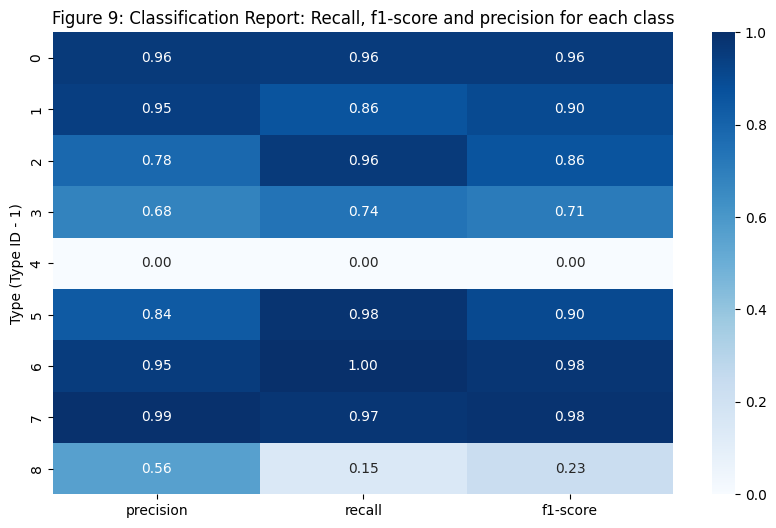

In [ ]:
report = classification_report(all_labels, all_preds, digits=4, output_dict=True, zero_division=0)

report_df = pd.DataFrame.from_dict(report).transpose().drop(["accuracy","macro avg","weighted avg"], axis=0).drop("support", axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Figure 9: Classification Report: Recall, f1-score and precision for each class")
plt.ylabel("Type (Type ID - 1)")
plt.show()


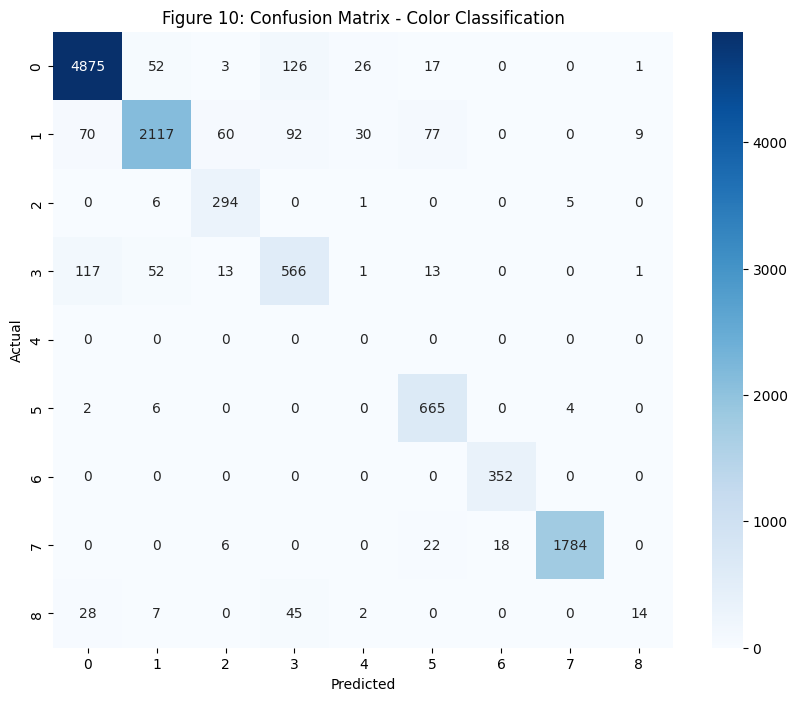

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Figure 10: Confusion Matrix - Color Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()